In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv('Indian_IPO_Market_Data.csv')
df.head(4)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28


In [3]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [64]:
df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,2010-02-03,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,2010-02-08,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,2010-02-15,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,2010-02-15,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,2010-02-19,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,2022-08-26,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,2022-09-06,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,2022-09-15,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,2022-09-26,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [6]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

In [8]:
df.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [11]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [15]:
df.describe(include=['object'])

,Date,IPOName
count,319,319
unique,287,319
top,16/08/21,Infinite Comp
freq,4,1


In [14]:
(df.dtypes)

Date                      object
IPOName                   object
Issue_Size               float64
Subscription_QIB         float64
Subscription_HNI         float64
Subscription_RII         float64
Subscription_Total       float64
Issue_Price                int64
Listing_Gains_Percent    float64
dtype: object

In [21]:
df['Date '] = pd.to_datetime(df['Date '], format='%d/%m/%y')

In [23]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'IPOName', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS (EDA)

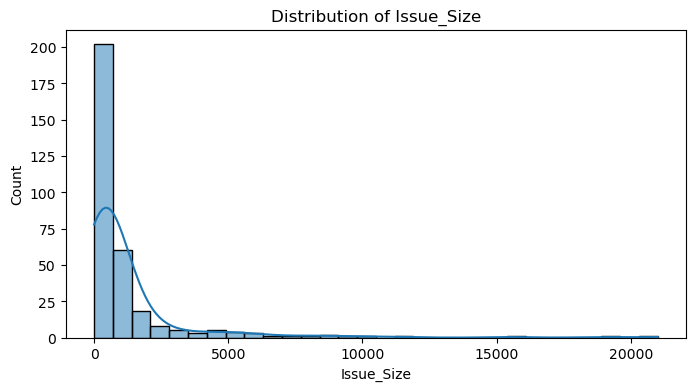

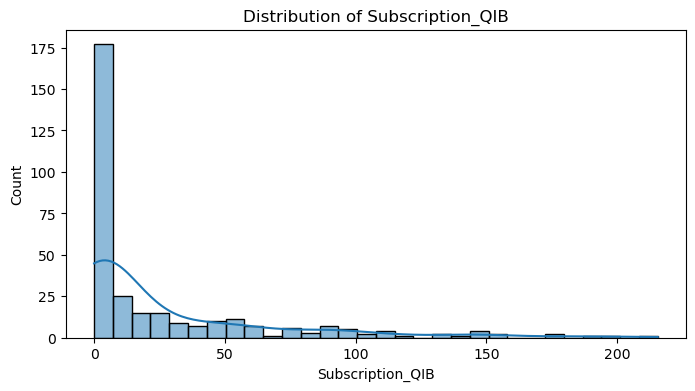

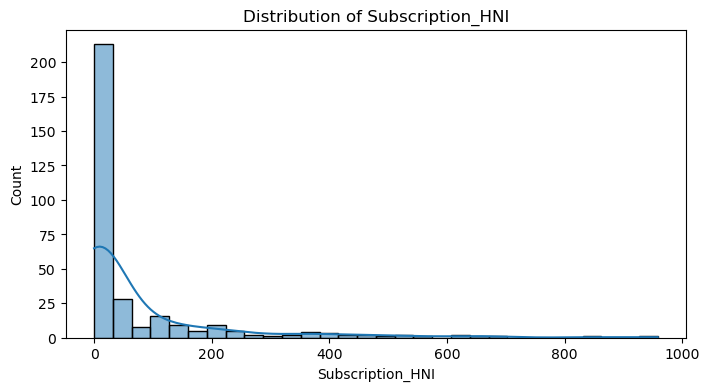

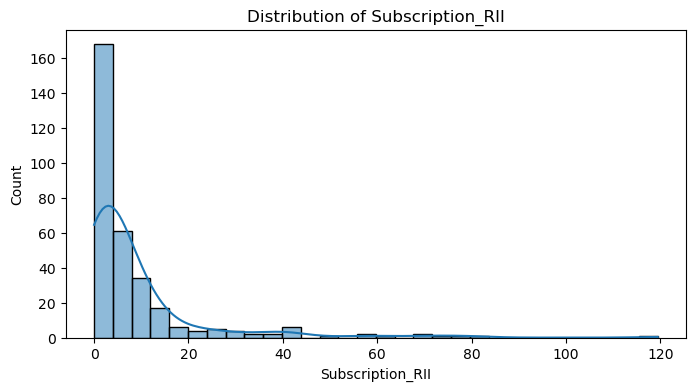

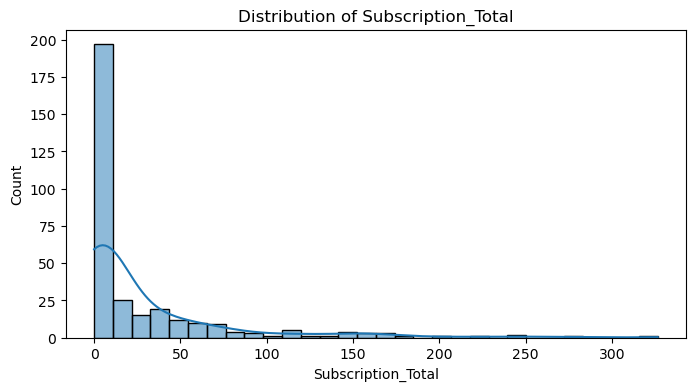

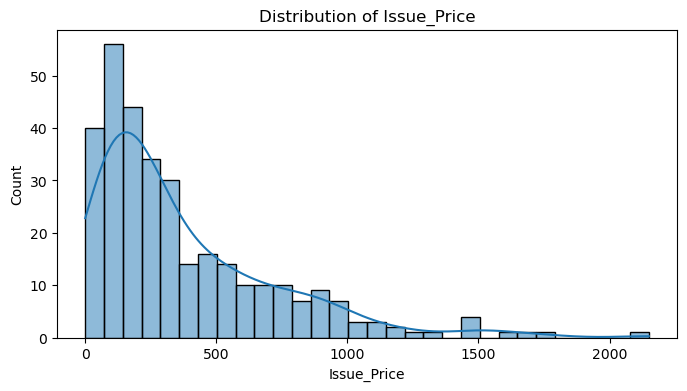

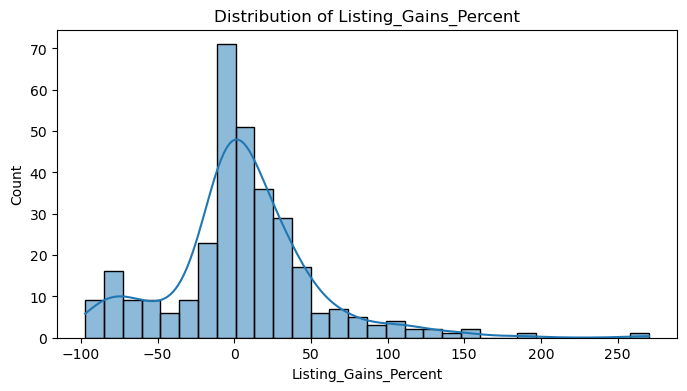

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


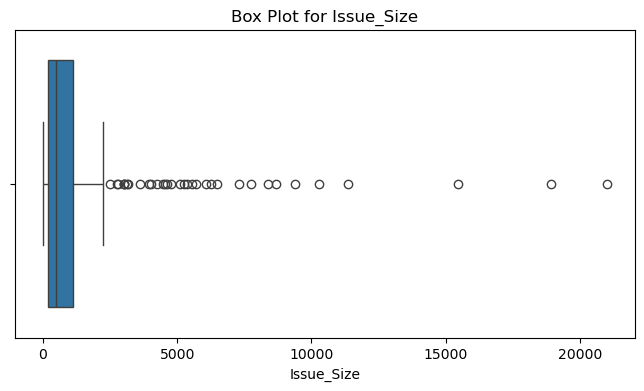

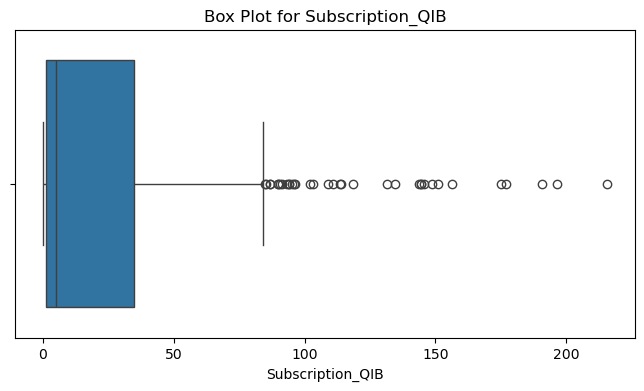

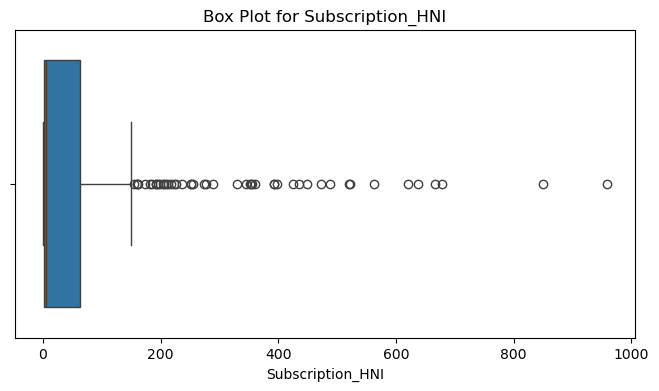

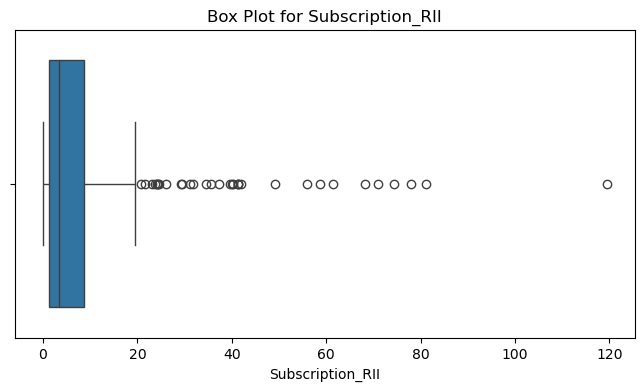

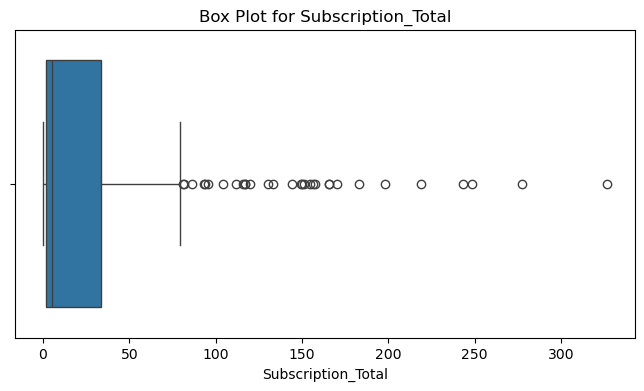

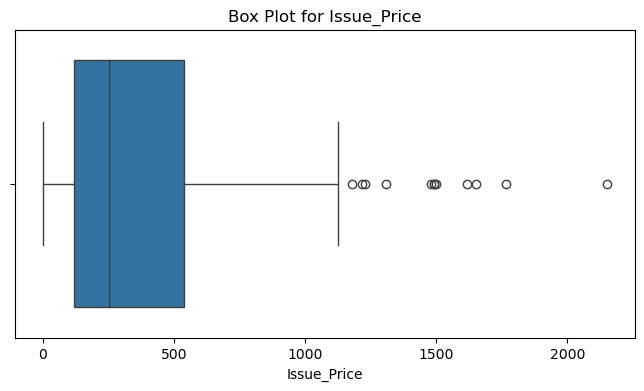

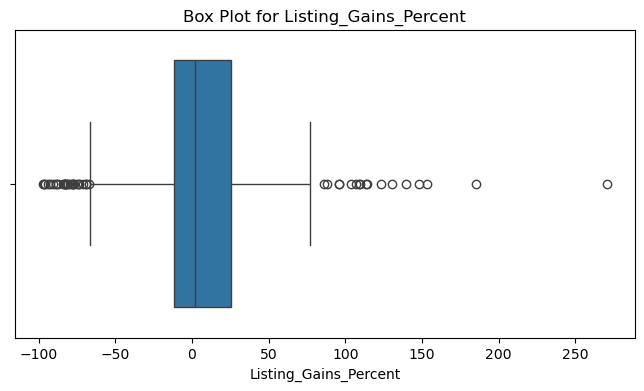

In [28]:
# Box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

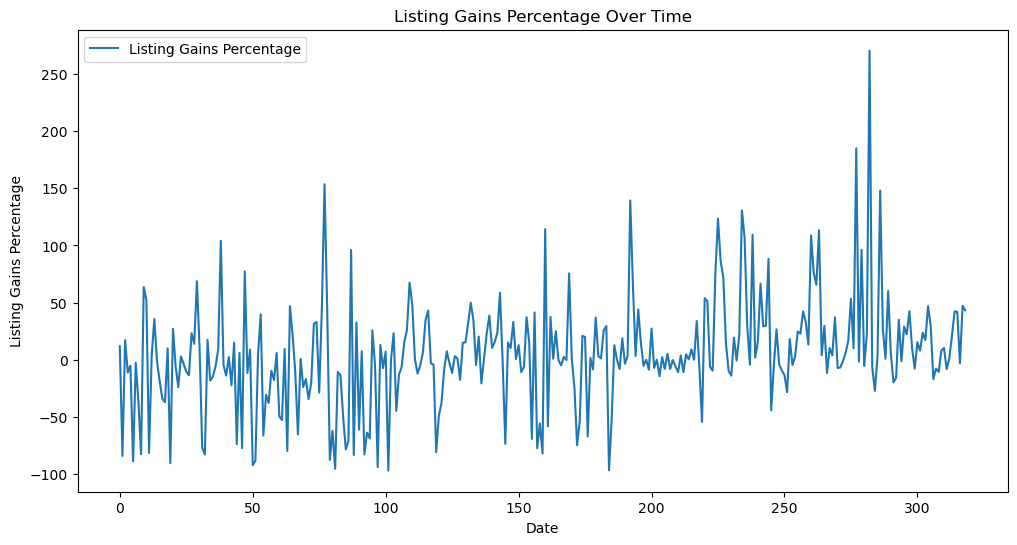

In [12]:
import matplotlib.pyplot as plt

# Visualizing the 'Listing_Gains_Percent' over time
plt.figure(figsize=(12, 6))
plt.plot(df['Listing_Gains_Percent'], label='Listing Gains Percentage')
plt.title('Listing Gains Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Listing Gains Percentage')
plt.legend()
plt.show()

## Model building

In [38]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(df['Listing_Gains_Percent'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If the p-value is greater than 0.05, the series is non-stationary, and we need to difference it.
if adf_test[1] > 0.05:
    print("Series is non-stationary. Differencing will be applied.")
else:
    print("Series is stationary.")

ADF Statistic: -6.18534067990175
p-value: 6.309289375297853e-08
Series is stationary.


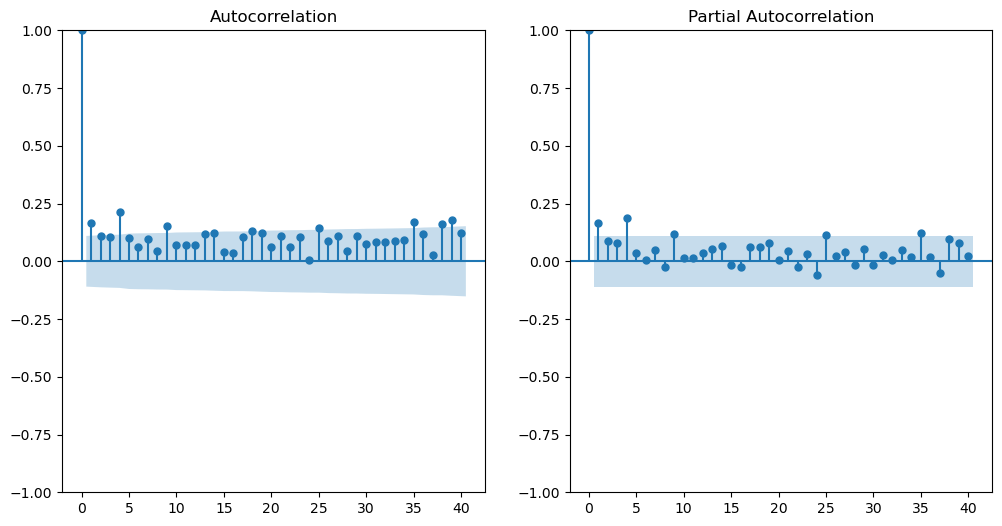

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to identify p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Listing_Gains_Percent'].dropna(), lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(df['Listing_Gains_Percent'].dropna(), lags=40, ax=plt.gca())
plt.show()

In [54]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Listing_Gains_Percent'].quantile(0.25)
Q3 = df['Listing_Gains_Percent'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df_no_outliers = df[(df['Listing_Gains_Percent'] >= lower_bound) & (df['Listing_Gains_Percent'] <= upper_bound)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (319, 9)
Dataset shape after removing outliers: (273, 9)


In [55]:
df_capped = df.copy()
df_capped['Listing_Gains_Percent'] = np.where(
    df['Listing_Gains_Percent'] < lower_bound, lower_bound,
    np.where(df['Listing_Gains_Percent'] > upper_bound, upper_bound, df['Listing_Gains_Percent'])
)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Assuming df_capped is the updated dataset after capping outliers
# Ensure the index is datetime for ARIMA to work correctly
df_capped['Date'] = pd.to_datetime(df_capped['Date'])  # Convert 'Date' to datetime
df_capped.set_index('Date', inplace=True)

In [57]:
# Define the target variable for the ARIMA model
data = df_capped['Listing_Gains_Percent']

# Split into training and testing sets (optional for evaluation)
train = data[:-10]  # All except last 10 points
test = data[-10:] 

In [58]:
from statsmodels.tsa.arima.model import ARIMA
# Build the ARIMA model (tune p, d, q as needed)
model = ARIMA(train, order=(1, 1, 1))  # Example: p=1, d=1, q=1
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=len(test))  # Forecast for test set

C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Listing_Gains_Percent   No. Observations:                  309
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -1546.960
Date:                   Sun, 19 Jan 2025   AIC                           3099.921
Time:                           09:03:13   BIC                           3111.111
Sample:                                0   HQIC                          3104.395
                                   - 309                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0855      0.052      1.657      0.097      -0.016       0.187
ma.L1         -0.9649      0.017    -56.342      0.000      -0.998      -0.931
sigma2      1338.3867    114

C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [59]:
# Convert forecast to pandas Series with same index as the test set
forecast_series = pd.Series(forecast, index=test.index)

In [47]:
print(forecast_series.isna().sum()) 

10


In [60]:
forecast_series = forecast_series.fillna(0)  # Replace NaNs with 0
# Or use the mean of the forecast series
forecast_series = forecast_series.fillna(forecast_series.mean())

In [61]:
rmse = np.sqrt(mean_squared_error(test, forecast_series))
mae = mean_absolute_error(test, forecast_series)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 28.857924908073347
MAE: 22.631


                                 SARIMAX Results                                 
Dep. Variable:     Listing_Gains_Percent   No. Observations:                  309
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -1546.960
Date:                   Sun, 19 Jan 2025   AIC                           3099.921
Time:                           09:03:38   BIC                           3111.111
Sample:                                0   HQIC                          3104.395
                                   - 309                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0855      0.052      1.657      0.097      -0.016       0.187
ma.L1         -0.9649      0.017    -56.342      0.000      -0.998      -0.931
sigma2      1338.3867    114

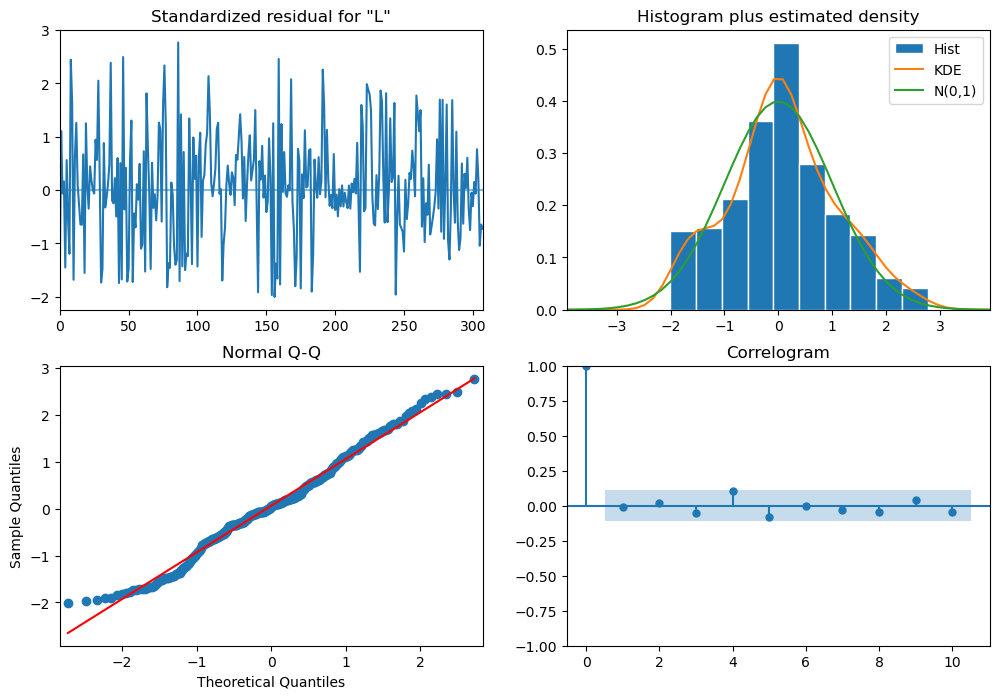

In [62]:
# Summary of the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


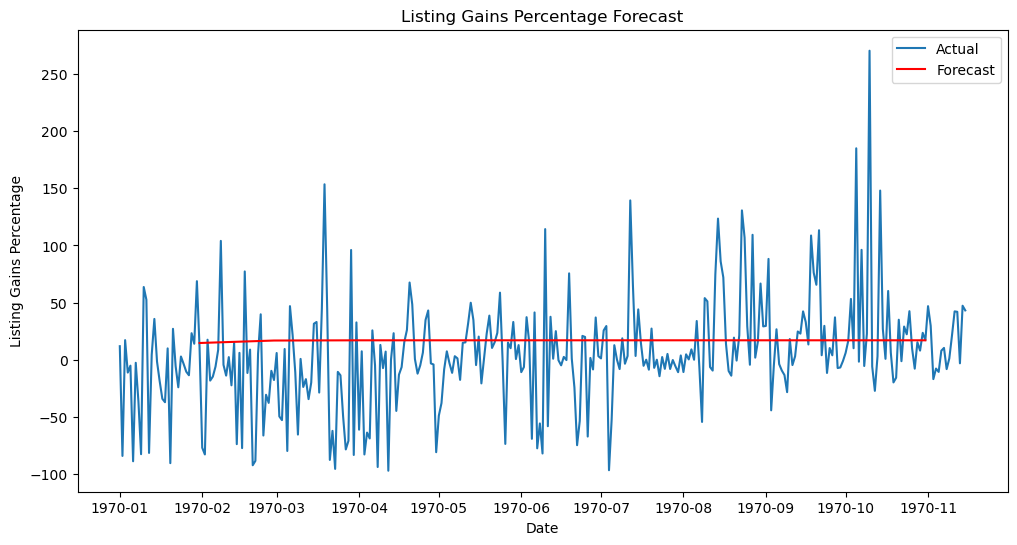

In [63]:
# Make predictions
forecast = model_fit.forecast(steps=10)  # Forecast next 10 values

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Listing_Gains_Percent'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=10, freq='M'), forecast, label='Forecast', color='red')
plt.title('Listing Gains Percentage Forecast')
plt.xlabel('Date')
plt.ylabel('Listing Gains Percentage')
plt.legend()
plt.show()

In [52]:
actual_values = test  # assuming 'test' contains the actual values
fitted_values = forecast_series  # assuming 'forecast_series' contains the predicted values

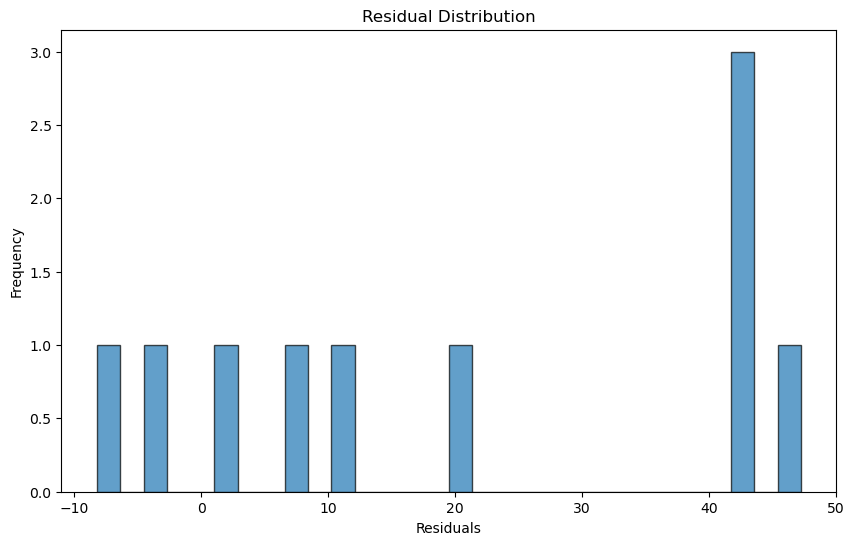

In [53]:
residuals = actual_values - fitted_values

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()